In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
# from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split

In [2]:
#model scoring using mean absolute error
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [3]:
raw_df = pd.read_csv('./train_dataset.csv',)

In [4]:
raw_df.head()

Start Time    Finish Time                Activity      Seq Code  \
0  1/1/2019 0:00  5/6/2020 8:15          Factory Closed           NaN   
1  5/6/2020 8:15  5/6/2020 8:15  Preparation/Changeover           NaN   
2  5/6/2020 8:15  5/6/2020 8:31              Production           NaN   
3  5/6/2020 8:31  5/6/2020 8:36                   Break           NaN   
4  5/6/2020 8:36  5/6/2020 8:42              Production  0001 of 0033   

  Recipe Name Break Reasons Missing Ingredients Kitting Line   Assembly Batch  \
0          D4           NaN                 NaN          NaN              NaN   
1          D4           NaN                 NaN          KL1              NaN   
2          D4           NaN                 NaN          KL1              NaN   
3          D4  machine down                 NaN          KL1              NaN   
4          D4           NaN                 NaN          KL1  Friday Assembly   

         Event Shift           Team Leader  Pickers Count  Time Consumption  \
0  Wednesday Morning  iXUsr_Davidson(8254)              2            495.50   
1  Wednesday Morning  iXUsr_Davidson(8254)              2              0.15   
2  Wednesday Morning  iXUsr_Davidson(8254)              2             15.72   
3  Wednesday Morning  iXUsr_Davidson(8254)              2              5.48   
4  Wednesday Morning  iXUsr_Davidson(8254)              2              6.00   

      Week  
0  2020-20  
1  2020-20  
2  2020-20  
3  2020-20  
4  2020-20

In [5]:
raw_df.describe()

Pickers Count  Time Consumption
count    7882.000000       7882.000000
mean        3.016493         19.324768
std         0.669439         94.389956
min         0.000000          0.070000
25%         3.000000          2.820000
50%         3.000000          4.150000
75%         3.000000          5.650000
max         4.000000       1239.270000

In [6]:
df_all = raw_df[(raw_df['Seq Code'].notnull()) & (raw_df['Time Consumption'] > 1) & (raw_df['Time Consumption'] < 10)]
df_all.head()

Start Time    Finish Time    Activity      Seq Code Recipe Name  \
4   5/6/2020 8:36  5/6/2020 8:42  Production  0001 of 0033          D4   
5   5/6/2020 8:42  5/6/2020 8:51  Production  0002 of 0033          D4   
9   5/6/2020 8:59  5/6/2020 9:06  Production  0004 of 0033          D4   
10  5/6/2020 9:06  5/6/2020 9:13  Production  0005 of 0033          D4   
11  5/6/2020 9:13  5/6/2020 9:20  Production  0006 of 0033          D4   

   Break Reasons Missing Ingredients Kitting Line   Assembly Batch  \
4            NaN                 NaN          KL1  Friday Assembly   
5            NaN                 NaN          KL1  Friday Assembly   
9            NaN                 NaN          KL1  Friday Assembly   
10           NaN                 NaN          KL1  Friday Assembly   
11           NaN                 NaN          KL1  Friday Assembly   

          Event Shift           Team Leader  Pickers Count  Time Consumption  \
4   Wednesday Morning  iXUsr_Davidson(8254)              2              6.00   
5   Wednesday Morning  iXUsr_Davidson(8254)              2              8.23   
9   Wednesday Morning  iXUsr_Davidson(8254)              2              7.47   
10  Wednesday Morning  iXUsr_Davidson(8254)              2              6.72   
11  Wednesday Morning  iXUsr_Davidson(8254)              2              7.22   

       Week  
4   2020-20  
5   2020-20  
9   2020-20  
10  2020-20  
11  2020-20

In [7]:
df_all.describe()

Pickers Count  Time Consumption
count    5452.000000       5452.000000
mean        3.025679          4.528718
std         0.661104          1.497669
min         1.000000          1.020000
25%         3.000000          3.470000
50%         3.000000          4.370000
75%         3.000000          5.430000
max         4.000000          9.970000

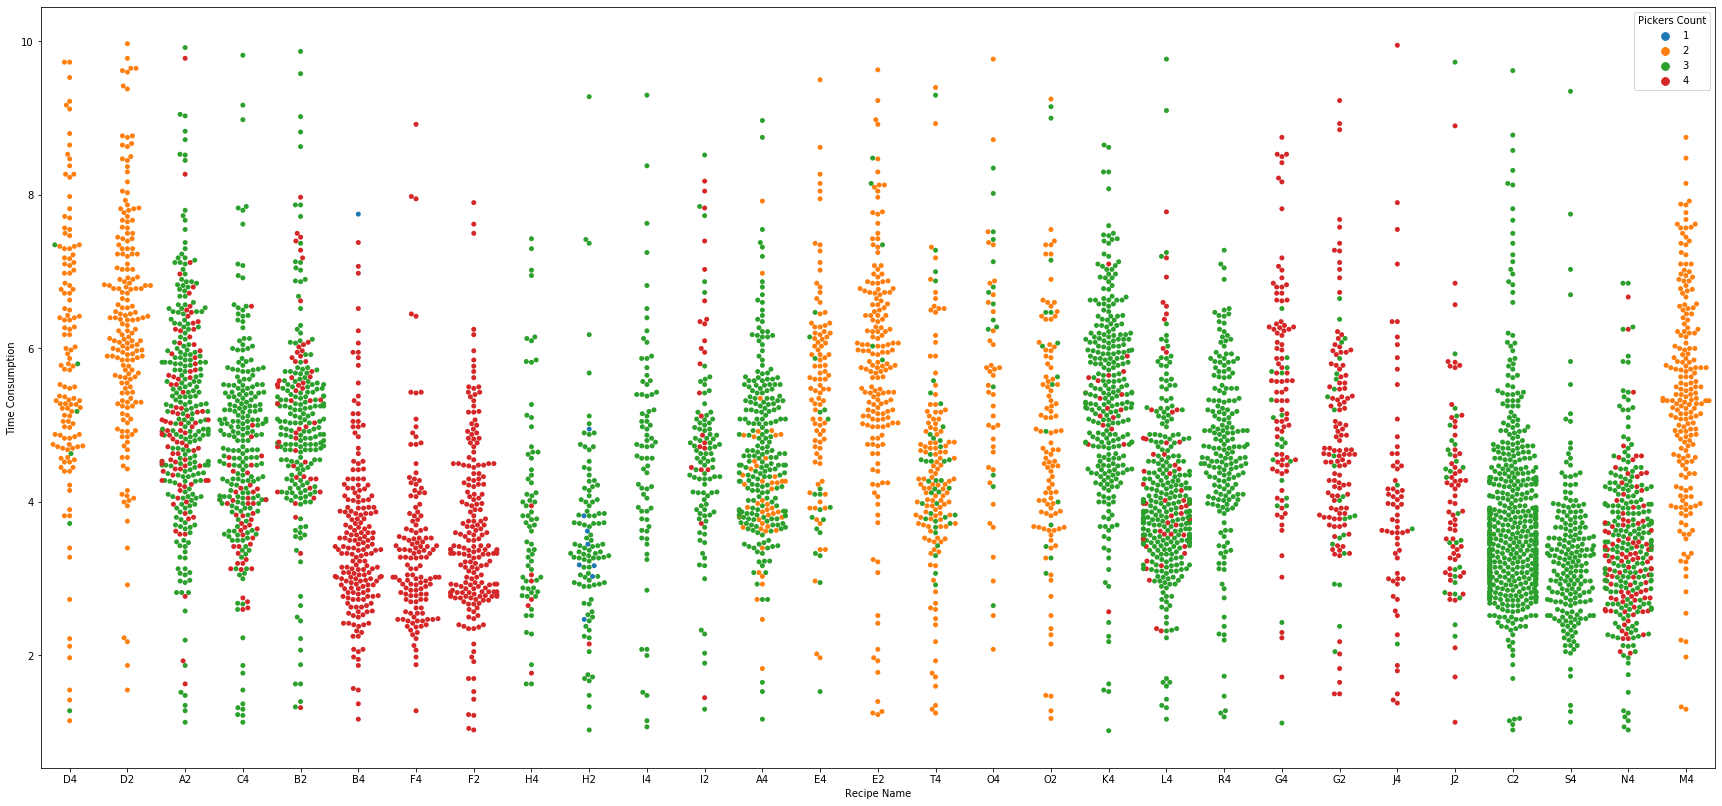

In [14]:

plt.figure(figsize = (30,14))

sns.swarmplot(data = df_all, x = "Recipe Name", y = "Time Consumption", hue = "Pickers Count")


In [ ]:
# Can we make assumption -- using 3 people or 4 people on each kitting line does not make too much difference. 
# If a recipe is able to be picked up by 3 pickers (without team leader/replenisher), then never roster more than 3 pickers on it.
# (same for recipes can be done by 2 or 3 pickers)
# (only for recipe C4, rostering 4 pickers making the overall speed faster. B2, I2 otherwise )

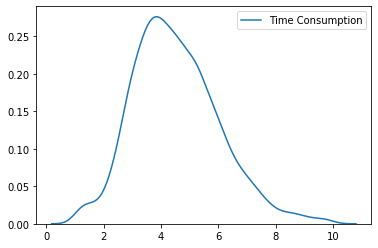

In [9]:
sns.kdeplot(data = df_all['Time Consumption'])

In [10]:
recipes = list(raw_df['Recipe Name'].unique())
len(recipes)

29

In [11]:
def plot_all_recipes(recipes):
    for recipe in recipes:
        temp_df = raw_df[(raw_df['Recipe Name'] == recipe) & (raw_df['Seq Code'].notnull()) & (raw_df['Time Consumption'] > 1) & (raw_df['Time Consumption'] < 10)]
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16,3))
        fig.suptitle(recipe, fontsize=16)
        sns.swarmplot(x=temp_df['Time Consumption'], hue = temp_df['Pickers Count'], ax = axes[0])
        sns.kdeplot(data = temp_df['Time Consumption'], ax = axes[1])
        plt.show()


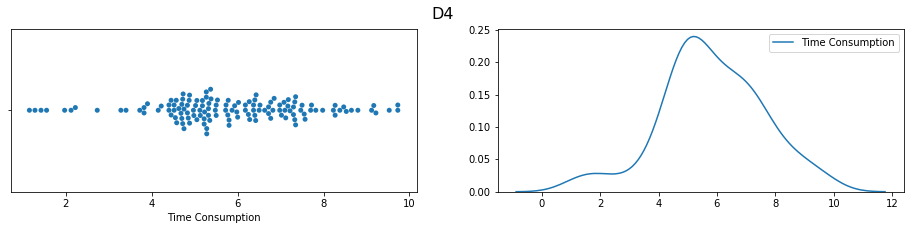

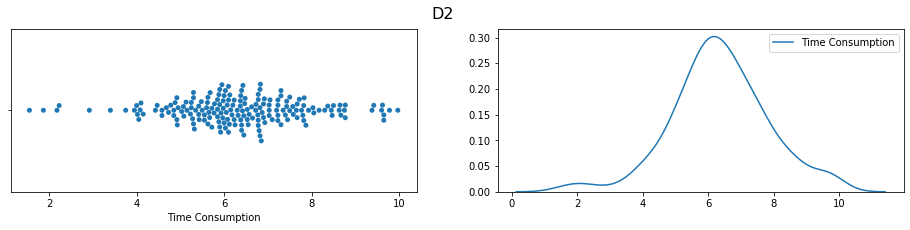

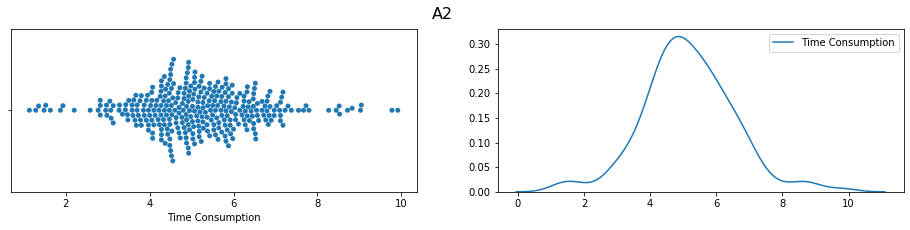

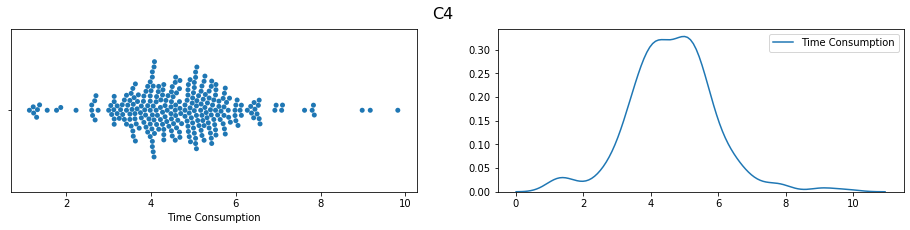

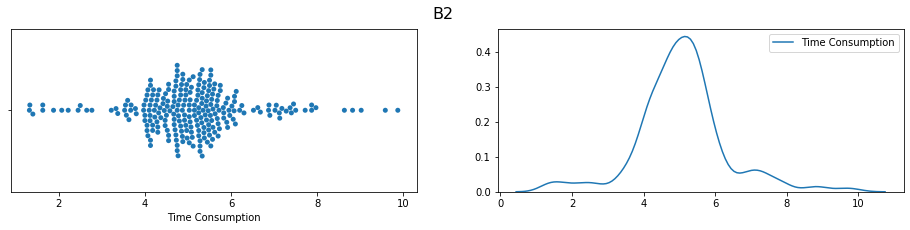

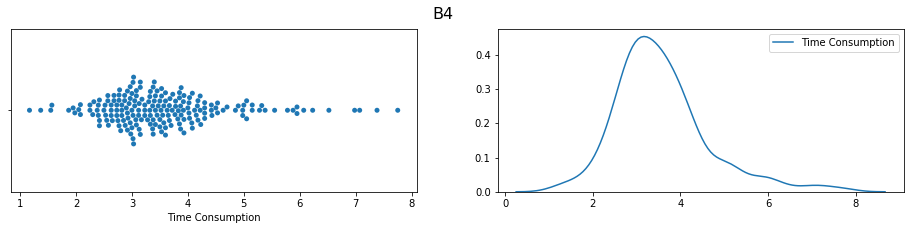

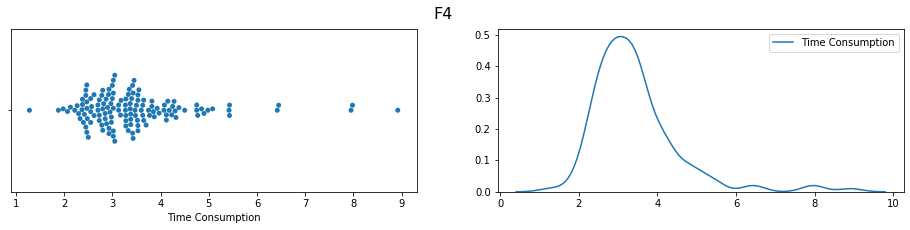

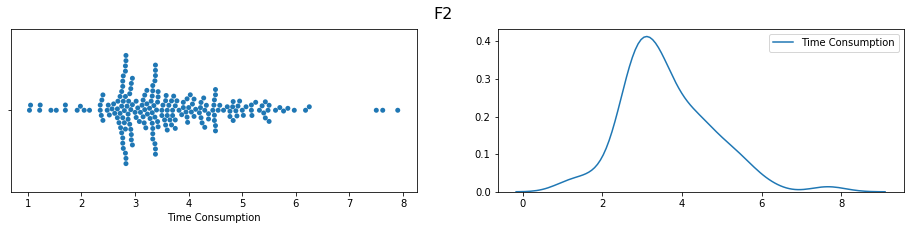

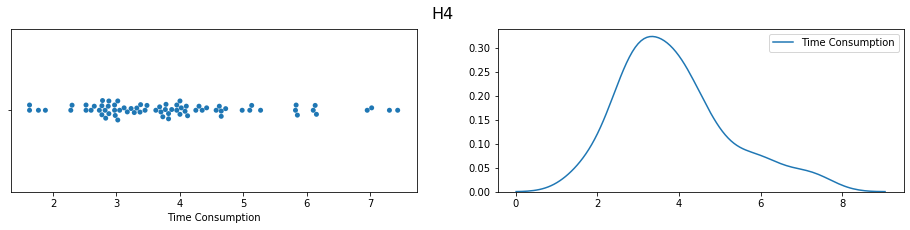

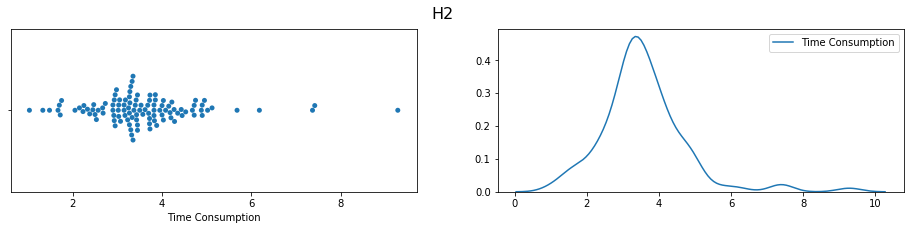

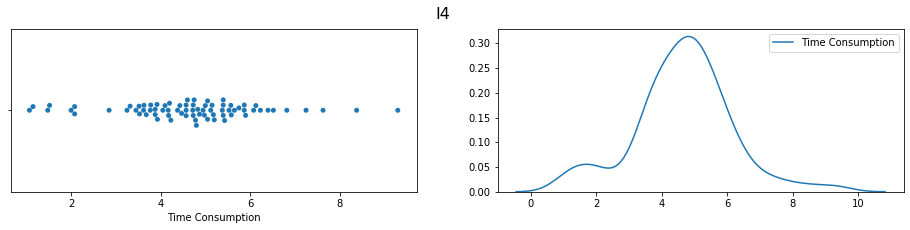

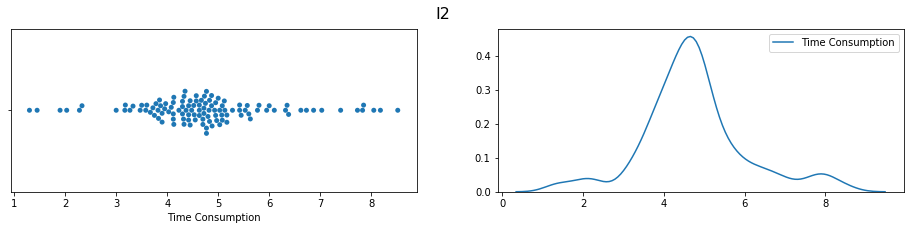

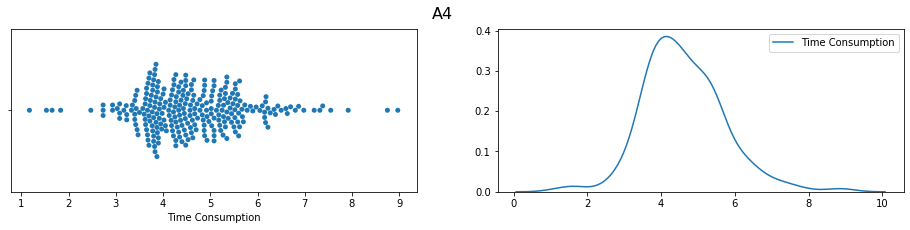

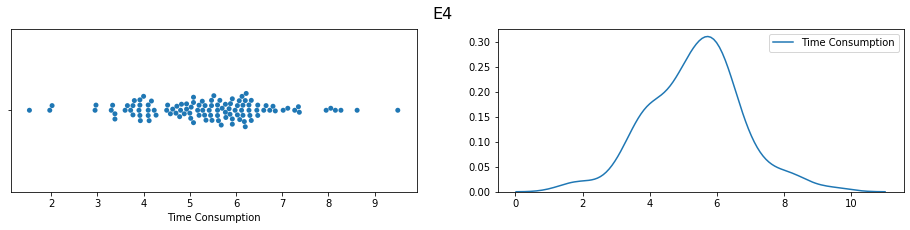

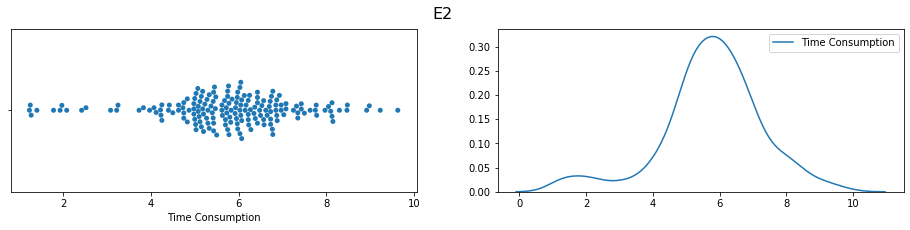

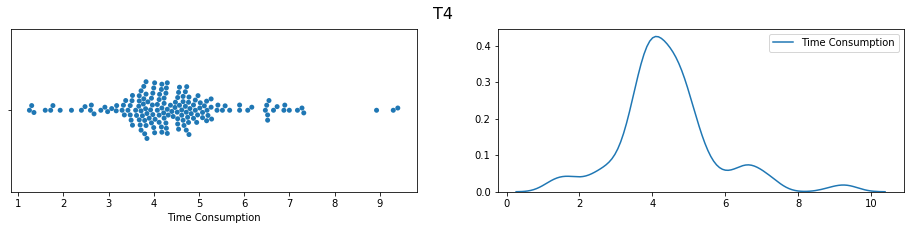

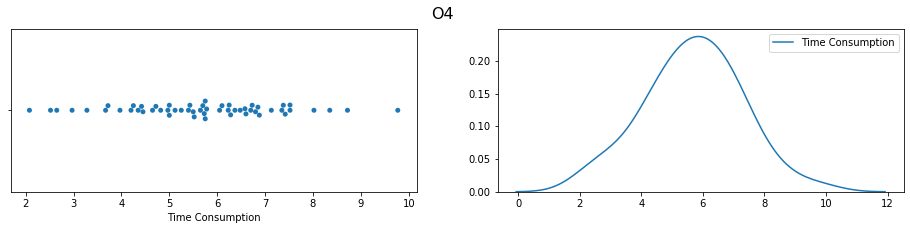

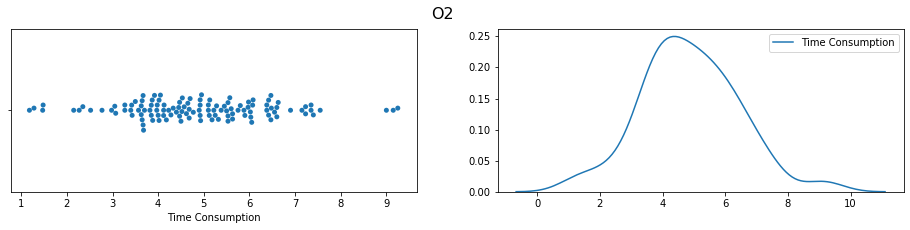

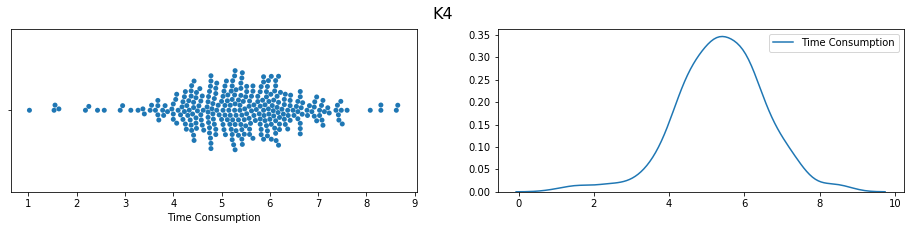

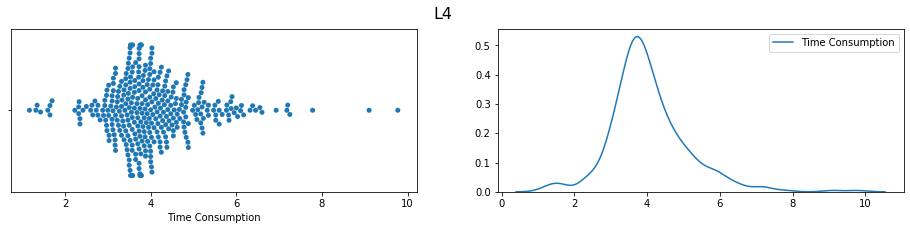

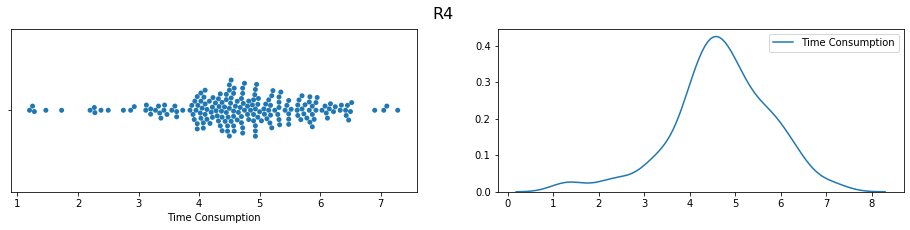

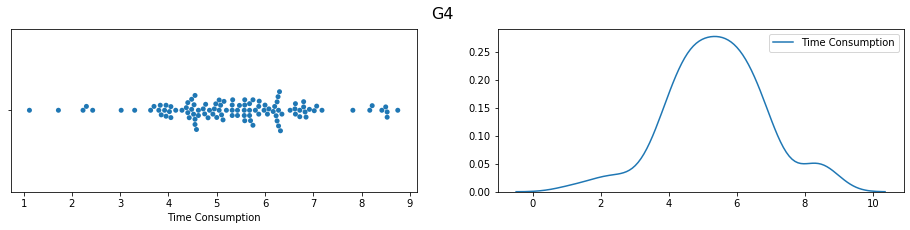

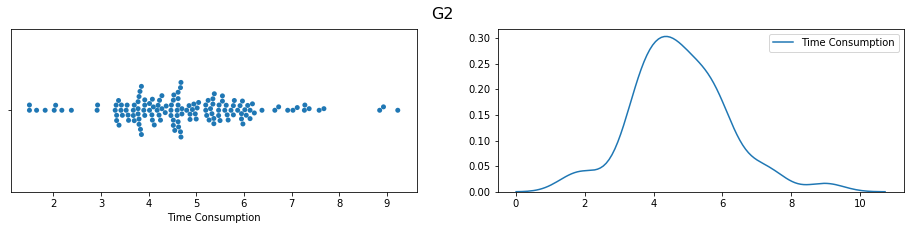

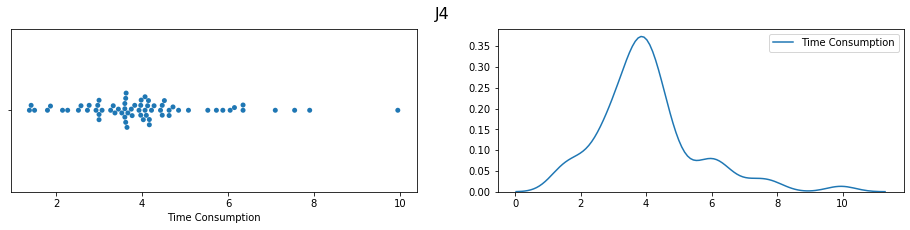

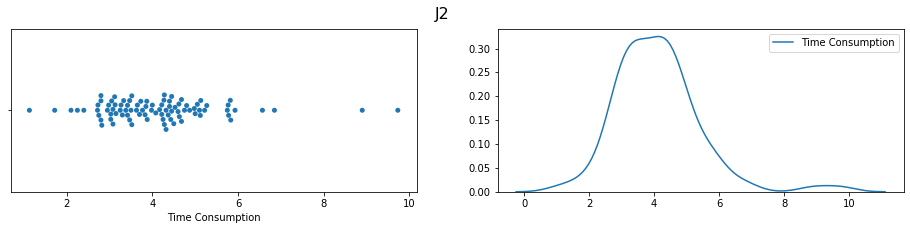

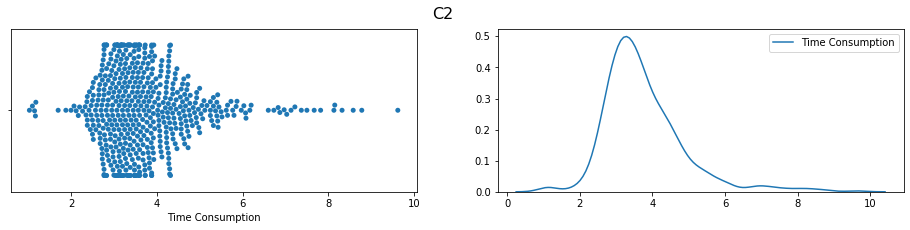

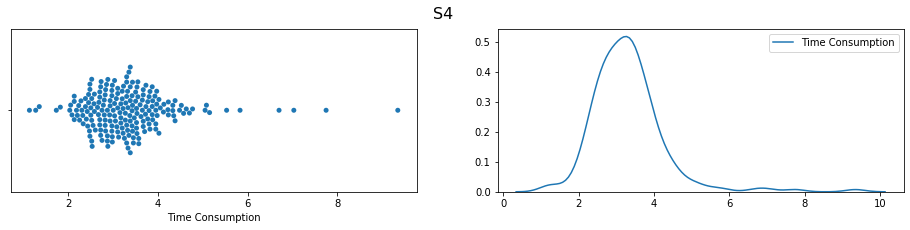

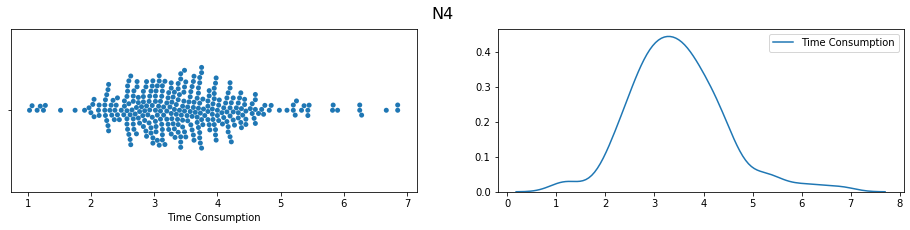

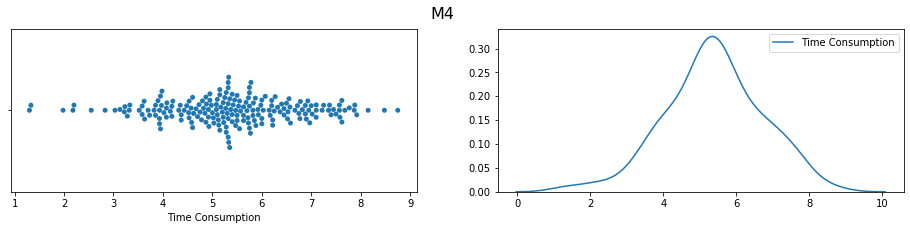

In [12]:
plot_all_recipes(recipes)

In [13]:
# using individual dolly speed/timecost
# pro: mks with high amout can have more weight whenbuilding the model
